# SPARKS FUND DATA ANALYSIS

## Objective : 
You work for Spark Funds, an asset management company. Spark Funds wants to make
investments in a few companies. The CEO of Spark Funds wants to understand the global trends
in investments so that she can take the investment decisions effectively.


## Business and Data Understanding
Spark Funds has two minor constraints for investments:  
1. It wants to invest between **5 to 15 million USD** per round of investment.  
2. It wants to invest only in **English-speaking countries** because of the ease of communication with the companies it would invest in.  
* For the analysis, consider a country to be English speaking only if **English** is one of the **official languages** in that country.

## Business objective: 
**The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.**

In [135]:
#import numpy and pandas packages
import numpy as np
import pandas as pd
import warnings  #hides warnings
warnings.filterwarnings('ignore')
#import matplotlib packages
import matplotlib.pyplot as plt
#import seaborn packages
import seaborn as sns

### DATA CLEANING

In [136]:
#Reading rounds2 csv file
rounds2 = pd.read_csv(r"D:\Industrail Project\Spark Funds Industrial IP-1\rounds2.csv",
                encoding = 'ISO-8859-1')
#showing top 5 rows
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [137]:
#removing junk characters from the string
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))

In [138]:
#dropping columns that doesn't hold meaning for analysis
rounds2.drop(['funding_round_code','funding_round_permalink','funded_at'],axis = 1,inplace = True)

In [139]:
#splitting company name
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x:x.split('/')[2])

In [140]:
#equally casing company name
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [141]:
#saving file for future purpose
rounds2.to_csv(r"D:\Industrail Project\Spark Funds Industrial IP-1\cleaned_rounds2.csv")

In [142]:
rounds2.head()

,company_permalink,funding_round_type,raised_amount_usd
0,-fame,venture,10000000.0
1,-qounter,venture,NaN
2,-qounter,seed,700000.0
3,-the-one-of-them-inc-,venture,3406878.0
4,0-6-com,venture,2000000.0


In [143]:
#reading companies csv file
companies = pd.read_csv(r"D:\Industrail Project\Spark Funds Industrial IP-1\companies.txt",
                delimiter = '\t',encoding = 'ISO-8859-1')
#showing top 5 rows
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [144]:
#removing junk characters from the string
companies['permalink'] = companies['permalink'].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))

In [145]:
#dropping columns that doesn't hold meaning for analysis
companies.drop(['name','homepage_url','state_code','region','city','founded_at'],axis = 1,inplace = True)

In [146]:
#splitting company name
companies['permalink'] = companies['permalink'].apply(lambda x:x.split('/')[2])

In [147]:
#equally casing company name
companies['permalink'] = companies['permalink'].str.lower()

In [148]:
#saving file for future purpose
companies.to_csv(r"D:\Industrail Project\Spark Funds Industrial IP-1\cleaned_companies_data.csv")

In [149]:
companies.head()

,permalink,category_list,status,country_code
0,-fame,Media,operating,IND
1,-qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,-the-one-of-them-inc-,Apps|Games|Mobile,operating,NaN
3,0-6-com,Curated Web,operating,CHN
4,004-technologies,Software,operating,USA


## DATA UNDERSTANDING

### Q) How many unique companies are present in rounds2?

In [150]:
print("Their are",rounds2['company_permalink'].nunique(),"unique values in rounds2 dataset.")   

Their are 66368 unique values in rounds2 dataset.


### Q) How many unique companies are present in the companies file?

In [151]:
print("Their are",companies['permalink'].nunique(),"unique values in companies dataset.")   

Their are 66368 unique values in companies dataset.


### Q) Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

In [152]:
#converting dataframe into set
seta  = set(companies['permalink'].unique())
setb  = set(rounds2['company_permalink'].unique())

In [153]:
seta.issubset(setb)

True

### Q) Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [154]:
#merging both dataframes
master_frame = rounds2.merge(companies,how = 'inner',right_on = 'permalink',left_on = 'company_permalink')

In [155]:
#showing top 5
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,status,country_code
0,-fame,venture,10000000.0,-fame,Media,operating,IND
1,-qounter,venture,NaN,-qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,-qounter,seed,700000.0,-qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,-the-one-of-them-inc-,venture,3406878.0,-the-one-of-them-inc-,Apps|Games|Mobile,operating,NaN
4,0-6-com,venture,2000000.0,0-6-com,Curated Web,operating,CHN


In [156]:
#looking for number of rows in master dataframe
master_frame.shape

(114949, 7)

In [157]:
#storing those rows which have value
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |
                             master_frame['category_list'].isnull())]

In [158]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,status,country_code
0,-fame,venture,10000000.0,-fame,Media,operating,IND
2,-qounter,seed,700000.0,-qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,0-6-com,venture,2000000.0,0-6-com,Curated Web,operating,CHN
6,01games-technology,undisclosed,41250.0,01games-technology,Games,operating,HKG
7,0ndine-biomedical-inc,seed,43360.0,0ndine-biomedical-inc,Biotechnology,operating,CAN


In [159]:
#looking for NaN value
master_frame.isna().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
permalink             0
category_list         0
status                0
country_code          0
dtype: int64

In [160]:
#Converting $ to million $.
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
#showing top 5
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,status,country_code
0,-fame,venture,10.00000,-fame,Media,operating,IND
2,-qounter,seed,0.70000,-qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,0-6-com,venture,2.00000,0-6-com,Curated Web,operating,CHN
6,01games-technology,undisclosed,0.04125,01games-technology,Games,operating,HKG
7,0ndine-biomedical-inc,seed,0.04336,0ndine-biomedical-inc,Biotechnology,operating,CAN


##  Funding Type Analysis
Spark Funds wants to choose one of these four investment types **(venture,angel,seed and private equity)** for each potential
investment they will make.

In [161]:
#looking for unique values
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [162]:
#looking for the count of unique value 
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

<AxesSubplot:xlabel='funding_round_type', ylabel='count'>

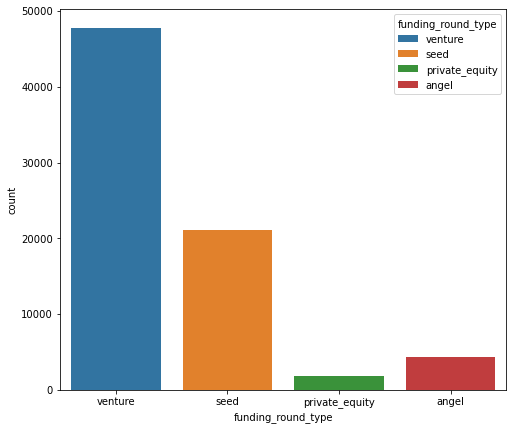

In [163]:
#retaining the rows with only specified funding type
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture','seed','angel','private_equity'])]
plt.figure(figsize=(8,7))
sns.countplot(x = 'funding_round_type',data = master_frame,hue = 'funding_round_type',dodge=False)

In [164]:
#dropping extra column
master_frame = master_frame.drop('permalink',axis = 1)

In [165]:
#showing top 5
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,status,country_code
0,-fame,venture,10.000000,Media,operating,IND
2,-qounter,seed,0.700000,Application Platforms|Real Time|Social Network...,operating,USA
4,0-6-com,venture,2.000000,Curated Web,operating,CHN
7,0ndine-biomedical-inc,seed,0.043360,Biotechnology,operating,CAN
8,0ndine-biomedical-inc,venture,0.719491,Biotechnology,operating,CAN


##### Q) Average funding amount of venture type

In [166]:
#extracting venture type investment dataframe
venture_df = master_frame[master_frame['funding_round_type'].isin(['venture'])]
venture_df.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,status,country_code
0,-fame,venture,10.000000,Media,operating,IND
4,0-6-com,venture,2.000000,Curated Web,operating,CHN
8,0ndine-biomedical-inc,venture,0.719491,Biotechnology,operating,CAN
10,0xdata,venture,20.000000,Analytics,operating,USA
11,0xdata,venture,1.700000,Analytics,operating,USA


In [167]:
#venture average
venture_mean = round(venture_df['raised_amount_usd'].mean(),2)
venture_mean

11.72

#### Q)Average funding amount of angel type

In [168]:
#extracting angel investment type dataframe
angel_df = master_frame[master_frame['funding_round_type'].isin(['angel'])]
angel_df.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,status,country_code
69,10seconds-software,angel,0.100000,Enterprise Software|Mobility|Software,operating,AUS
93,121nexus,angel,0.500000,Health Diagnostics|Medical Devices|Personaliza...,operating,USA
106,12return,angel,0.619494,Consumer Goods|Retail|SaaS|Software,operating,NLD
125,15five,angel,1.000000,Software,operating,USA
126,15five,angel,0.200000,Software,operating,USA


In [169]:
#angel mean
angel_mean = round(angel_df['raised_amount_usd'].mean(),2)
angel_mean

0.97

##### Q) Average funding amount of seed type

In [170]:
#extracting seed investment type dataframe
seed_df = master_frame[master_frame['funding_round_type'].isin(['seed'])]
seed_df.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,status,country_code
2,-qounter,seed,0.70000,Application Platforms|Real Time|Social Network...,operating,USA
7,0ndine-biomedical-inc,seed,0.04336,Biotechnology,operating,CAN
9,0xdata,seed,3.00000,Analytics,operating,USA
13,1,seed,0.15000,Mobile,operating,USA
15,1,seed,1.00005,Mobile,operating,USA


In [171]:
#seed mean
seed_mean = round(seed_df['raised_amount_usd'].mean(),2)
seed_mean

0.75

##### Q) Average funding amount of private equity type

In [172]:
#private equity investment type dataframe
equity_df = master_frame[master_frame['funding_round_type'].isin(['private_equity'])]
equity_df.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,status,country_code
21,1-800-publicrelations-inc-,private_equity,6.000000,Internet Marketing|Media|Public Relations,operating,USA
153,1c-company,private_equity,200.000000,Games|Software|Video Games,closed,RUS
231,21st-century-oncology,private_equity,325.000000,Health and Wellness,operating,USA
312,2dheat,private_equity,0.200708,Clean Technology,operating,GBR
326,2nd-story-software-inc,private_equity,85.000000,Software,acquired,USA


In [173]:
#private equity mean
equity_mean = round(equity_df['raised_amount_usd'].mean(),2)
equity_mean

73.94

##### Q) Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [174]:
#creating a dictionary of means of specified investment type
mean_list = {'venture' : venture_mean,'seed' : seed_mean,'angel' : angel_mean,'equity' : equity_mean}
#looking for the investment type which is in between 5 million to 15 million $
investment_type = {mean for mean in mean_list if mean_list[mean] > 5 and mean_list[mean] < 15}
investment_type

{'venture'}

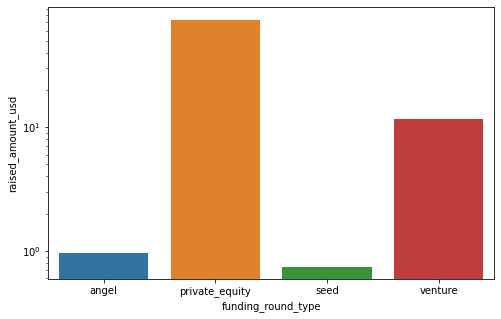

In [175]:
visual_df = master_frame.pivot_table(values = 'raised_amount_usd',index = 'funding_round_type',
                                    aggfunc="mean").reset_index()
plt.figure(figsize = (8,5))
sns.barplot(data = visual_df,x = 'funding_round_type', y = 'raised_amount_usd')
plt.yscale('log')

# COUNTRY ANALYSIS
Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.
* Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
* For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [176]:
#web scrapping for knowing the primary language of country
language_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language")

In [177]:
table1 = language_df[0]
table1

,No.,Country,Alpha-3 code,Region,Population,Primary language?
0,1,Australia,AUS,Oceania,25019600,Yes
1,2,New Zealand[1],NZL,Oceania,4893830,Yes
2,3,United Kingdom,GBR,Europe,66040229,Yes
3,4,United States,USA,North America/Oceania,328239523,Yes


In [178]:
table2 = language_df[1]
table2.head()

,No.,Country,Alpha-3 code,Region,Population1,Primary language?
0,1,Antigua and Barbuda[2],ATG,Caribbean,85000,Yes
1,2,Bahamas[2],BHS,Caribbean,331000,Yes
2,3,Barbados[3],BRB,Caribbean,294000,Yes
3,4,Belize[4],BLZ,Central America,288000,Yes
4,5,Botswana[4],BWA,Africa,1882000,No


In [179]:
#appending both tables to each other
language_master_df = table1.append(table2)
#dropping extra column (Nr)
language_master_df = language_master_df.drop('No.',axis = 1)

In [180]:
#reseting index
language_master_df.reset_index(drop = True).head()

,Country,Alpha-3 code,Region,Population,Primary language?,Population1
0,Australia,AUS,Oceania,25019600.0,Yes,NaN
1,New Zealand[1],NZL,Oceania,4893830.0,Yes,NaN
2,United Kingdom,GBR,Europe,66040229.0,Yes,NaN
3,United States,USA,North America/Oceania,328239523.0,Yes,NaN
4,Antigua and Barbuda[2],ATG,Caribbean,NaN,Yes,85000


In [181]:
#extracting necessary columns
language_master_df = language_master_df[['Alpha-3 code','Primary language?']]
language_master_df.head()

,Alpha-3 code,Primary language?
0,AUS,Yes
1,NZL,Yes
2,GBR,Yes
3,USA,Yes
0,ATG,Yes


In [182]:
#splitting primary column behalf on space
language_master_df['Primary language?']  = language_master_df['Primary language?'].apply(lambda x:x.split(' ')[0])
language_master_df.head()

,Alpha-3 code,Primary language?
0,AUS,Yes
1,NZL,Yes
2,GBR,Yes
3,USA,Yes
0,ATG,Yes


In [183]:
#renaming columns
language_master_df = language_master_df.rename(columns={'Alpha-3 code':'country_code','Primary language?':'English Langauge'})
language_master_df.head()

,country_code,English Langauge
0,AUS,Yes
1,NZL,Yes
2,GBR,Yes
3,USA,Yes
0,ATG,Yes


In [184]:
#merging scrapped dataframe with venture type investment dataframe
master_venture_df = venture_df.merge(language_master_df,on = 'country_code')
master_venture_df.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,status,country_code,English Langauge
0,-fame,venture,10.000000,Media,operating,IND,No
1,21diamonds-india,venture,6.369507,E-Commerce,operating,IND,No
2,247-learning-private,venture,4.000000,EdTech|Education|Systems,operating,IND,No
3,3dsoc,venture,1.240000,3D|Mobile,operating,IND,No
4,3dsoc,venture,0.825000,3D|Mobile,operating,IND,No


In [185]:
#saving dataframe to csv for future purpose
master_venture_df.to_csv(r"D:\Industrail Project\Spark Funds Industrial IP-1\Countries With their primary language as English.csv")

##### Q) Top English speaking country


In [186]:
#creating a pivot table to represent data,sorted behalf on raised amount usd
top9 = master_venture_df.pivot_table(values = 'raised_amount_usd',index = 'country_code',
                                     aggfunc = 'sum').sort_values(by = 'raised_amount_usd',ascending = False)

In [187]:
top9 = top9.reset_index()
top9.head(9)

,country_code,raised_amount_usd
0,USA,420068.029342
1,GBR,20072.813004
2,IND,14261.508718
3,CAN,9482.217668
4,SGP,2793.917856
5,IRL,1669.285543
6,AUS,1319.028698
7,NZL,448.316383
8,ZAF,233.713106


<AxesSubplot:xlabel='country_code', ylabel='raised_amount_usd'>

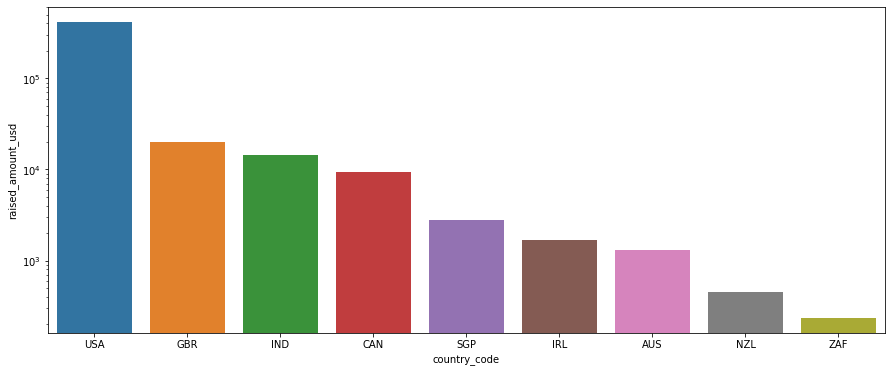

In [188]:
plt.figure(figsize=(15,6))
plt.yscale('log')
sns.barplot(data = top9.head(9), x = 'country_code', y = 'raised_amount_usd' )

# SECTOR ANALYSIS 1
The __business rule__ says that the __first string__ before the vertical bar will be __considered the primary sector__.Extract the primary sector of each category list from the category_list column.


In [189]:
#retaining rows of top 3 english speaking countries
master_venture_df = master_venture_df[(master_venture_df['country_code'] == 'USA')|
                                     (master_venture_df['country_code'] == 'GBR')|
                                     (master_venture_df['country_code'] == 'IND')]
master_venture_df.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,status,country_code,English Langauge
0,-fame,venture,10.000000,Media,operating,IND,No
1,21diamonds-india,venture,6.369507,E-Commerce,operating,IND,No
2,247-learning-private,venture,4.000000,EdTech|Education|Systems,operating,IND,No
3,3dsoc,venture,1.240000,3D|Mobile,operating,IND,No
4,3dsoc,venture,0.825000,3D|Mobile,operating,IND,No


In [190]:
#extracting first string from category list by splitting behalf on this '|' character
master_venture_df['category_list'] = master_venture_df['category_list'].apply(lambda x:x.split('|')[0])
master_venture_df.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,status,country_code,English Langauge
0,-fame,venture,10.000000,Media,operating,IND,No
1,21diamonds-india,venture,6.369507,E-Commerce,operating,IND,No
2,247-learning-private,venture,4.000000,EdTech,operating,IND,No
3,3dsoc,venture,1.240000,3D,operating,IND,No
4,3dsoc,venture,0.825000,3D,operating,IND,No


In [191]:
#reading mapping csv file
mapping = pd.read_csv(r"D:\Industrail Project\Spark Funds Industrial IP-1\mapping.csv")

In [192]:
#removing 1 NaN value of mapping csv file
mapping[1:]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [193]:
#reshaping the mapping dataframe into a new dataframe using melt() method
mapping_melt_frame = pd.melt(mapping , id_vars = ['category_list'] , var_name='main_sector')
mapping_melt_frame = mapping_melt_frame[mapping_melt_frame['value'] == 1]
mapping_melt_frame

,category_list,main_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6122,Social Television,"Social, Finance, Analytics, Advertising",1
6123,Social Travel,"Social, Finance, Analytics, Advertising",1
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [194]:
#merging the venture dataframe to melted mapping dataframe behlaf on category list
master_venture_df = master_venture_df.merge(mapping_melt_frame,on = 'category_list')

In [195]:
#dropping unnecessary columns
master_venture_df = master_venture_df.drop(['English Langauge','value'],axis = 1)

In [196]:
master_venture_df.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,status,country_code,main_sector
0,-fame,venture,10.00,Media,operating,IND,Entertainment
1,manas-informatics,venture,0.16,Media,operating,IND,Entertainment
2,all-def-digital,venture,5.00,Media,operating,USA,Entertainment
3,audiosocket,venture,0.65,Media,operating,USA,Entertainment
4,audiosocket,venture,0.75,Media,operating,USA,Entertainment


# Sector Analysis 2
1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:
 - All the columns of the master_frame along with the primary sector and the main sector
 - The total number (or count) of investments for each main sector in a separate column
 - The total amount invested in each main sector in a separate column 

In [197]:
#creating d1 dataframe for USA 
d1 = master_venture_df[(master_venture_df['country_code']==top9['country_code'][0]) & (master_venture_df['raised_amount_usd']>=5.0) & (master_venture_df['raised_amount_usd']<=15.0) ]
#creating d2 dataframe for GBR
d2 = master_venture_df[(master_venture_df['country_code']==top9['country_code'][1]) & (master_venture_df['raised_amount_usd']>=5.0) & (master_venture_df['raised_amount_usd']<=15.0) ]
#creating d3 dataframe for IND
d3 = master_venture_df[(master_venture_df['country_code']==top9['country_code'][2]) & (master_venture_df['raised_amount_usd']>=5.0) & (master_venture_df['raised_amount_usd']<=15.0) ]

##### Total number of investments (count)

<AxesSubplot:xlabel='count', ylabel='main_sector'>

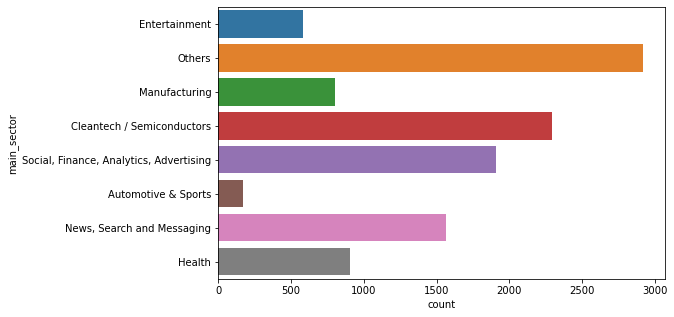

In [198]:
plt.figure(figsize=(8,5))
sns.countplot(data = d1,y = 'main_sector')

In [199]:
#for USA
d1['main_sector'].value_counts()[0]

2923

In [200]:
#for GBR
d2['main_sector'].value_counts()[0]

143

<AxesSubplot:xlabel='count', ylabel='main_sector'>

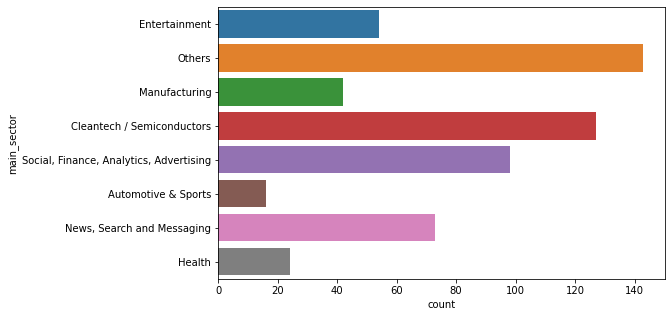

In [201]:
plt.figure(figsize=(8,5))
sns.countplot(data = d2,y = 'main_sector')

In [202]:
#for IND
d3['main_sector'].value_counts()[0]

109

<AxesSubplot:xlabel='count', ylabel='main_sector'>

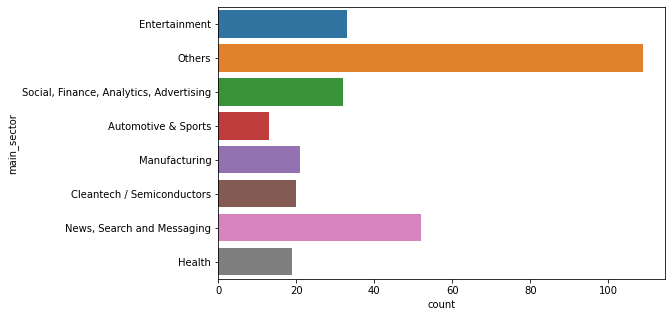

In [203]:
plt.figure(figsize=(8,5))
sns.countplot(data = d3,y = 'main_sector')

#####  Total amount of investment (USD)

In [204]:
#for USA
round(d1['raised_amount_usd'].sum(),2)

99661.52

In [205]:
#for GBR
round(d2['raised_amount_usd'].sum(),2)

5028.7

In [206]:
#for IND
round(d3['raised_amount_usd'].sum(),2)

2683.54

##### Top sector (based on count of investments)

In [207]:
#for USA
d1['main_sector'].value_counts()

Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
News, Search and Messaging                 1563
Health                                      908
Manufacturing                               799
Entertainment                               580
Automotive & Sports                         167
Name: main_sector, dtype: int64

In [208]:
#for GBR
d2['main_sector'].value_counts()

Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

In [209]:
#for IND
d3['main_sector'].value_counts()

Others                                     109
News, Search and Messaging                  52
Entertainment                               33
Social, Finance, Analytics, Advertising     32
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

##### Top second sector

In [210]:
#for USA
d1['main_sector'].value_counts().index[1]

'Cleantech / Semiconductors'

In [211]:
#for GBR
d2['main_sector'].value_counts().index[1]

'Cleantech / Semiconductors'

In [212]:
#for IND
d3['main_sector'].value_counts().index[1]

'News, Search and Messaging'

##### Top third sector

In [213]:
#for USA
d1['main_sector'].value_counts().index[2]

'Social, Finance, Analytics, Advertising'

In [214]:
#for GBR
d2['main_sector'].value_counts().index[2]

'Social, Finance, Analytics, Advertising'

In [215]:
#for IND
d3['main_sector'].value_counts().index[2]

'Entertainment'

##### Number of investments in top sector

In [216]:
#for USA
d1.groupby(by = 'main_sector')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

main_sector
Others    26089.280296
Name: raised_amount_usd, dtype: float64

In [217]:
#for GBR
d2.groupby(by = 'main_sector')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)


main_sector
Others    1249.124289
Name: raised_amount_usd, dtype: float64

In [218]:
#for IND
d3.groupby(by = 'main_sector')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

main_sector
Others    1007.409507
Name: raised_amount_usd, dtype: float64

##### For the top sector count-wise (point 3),which company received the highest

In [219]:
#for USA
d1 = d1[d1['main_sector'] == 'Others']
d1.groupby(by = 'company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

company_permalink
virtustream    64.3
Name: raised_amount_usd, dtype: float64

In [220]:
#for GBR
d2 = d2[d2['main_sector'] == 'Others']
d2.groupby(by = 'company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

company_permalink
electric-cloud    37.0
Name: raised_amount_usd, dtype: float64

In [221]:
#for IND
d3 = d3[d3['main_sector'] == 'Others']
d3.groupby(by = 'company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

company_permalink
firstcry-com    39.0
Name: raised_amount_usd, dtype: float64